In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

churn = pd.read_csv('datasets/churn.csv')

In [2]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [3]:
churn.columns = churn.columns.str.replace("'","")
# churn.rename(columns = {'Intl Plan':'Intl Plans'}, inplace = True) 

In [4]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
churn['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [7]:
true_false = {'False.': 0, 'True.': 1}
churn['Churn?'] = churn['Churn?'].replace(true_false)

In [8]:
churn['Churn?'].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [9]:
yes_no = {'no': 0, 'yes': 1}
churn['Intl Plan'] = churn['Intl Plan'].replace(yes_no)
churn['VMail Plan'] = churn['VMail Plan'].replace(yes_no)

In [10]:
churn.describe()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [11]:
churn['CSCalls?'] = 0
for i in range(len(churn)):
    if churn['CustServ Calls'][i] >= 4:
        churn['CSCalls?'][i] = 1

<ipython-input-11-d4d6d21e1d57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['CSCalls?'][i] = 1


In [12]:
churn.describe()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,CSCalls?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,0.080108
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.271501
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


In [13]:
y = churn['Churn?']
X = churn[['Account Length', 'Intl Plan', 'VMail Plan', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CSCalls?']] 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 8), (667, 8), (2666,), (667,))

In [15]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [16]:
accuracy = clf.score(X_train, y_train)
print(accuracy)

0.8405851462865717


In [17]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8515742128935532


In [18]:
# generate classification report using predictions for binary model 
# binary_pred = np.round(binary_model.predict(X_test)).astype(int)
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
class_report = pd.DataFrame(classification_report(y_pred, y_test, digits=2, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.956822,0.159091,0.851574,0.557957,0.910178
recall,0.882166,0.358974,0.851574,0.620570,0.851574
f1-score,0.917978,0.220472,0.851574,0.569225,0.877195
support,628.000000,39.000000,0.851574,667.000000,667.000000


In [19]:
clf.predict_proba(X_test[:10])

array([[0.97582193, 0.02417807],
       [0.96098779, 0.03901221],
       [0.89419112, 0.10580888],
       [0.58873669, 0.41126331],
       [0.95102922, 0.04897078],
       [0.82000061, 0.17999939],
       [0.41354169, 0.58645831],
       [0.99468929, 0.00531071],
       [0.93411326, 0.06588674],
       [0.99711256, 0.00288744]])

In [20]:
# Customer Service Calls
# remove scaling
# predict on unseen data - see slides

# KMeans to cluster data - scale first - use elbow method to determine optimal #

X_new1 = [[100, 0, 0, 100, 100, 100, 0, 0]]
clf.predict_proba(X_new1)

array([[0.99716725, 0.00283275]])

In [21]:
X_new2 = [[80, 0, 0, 180, 180, 200, 10, 0]]
clf.predict_proba(X_new2)

array([[0.93526565, 0.06473435]])

In [22]:
X_new3 = [[90, 1, 0, 300, 300, 300, 20, 1]]
clf.predict_proba(X_new3)

array([[0.00239647, 0.99760353]])

In [23]:
X_new4 = [[75, 0, 1, 300, 300, 300, 20, 0]]
clf.predict_proba(X_new4)

array([[0.39027839, 0.60972161]])

In [25]:
# regression does not require scaling
# use scaling for clustering

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


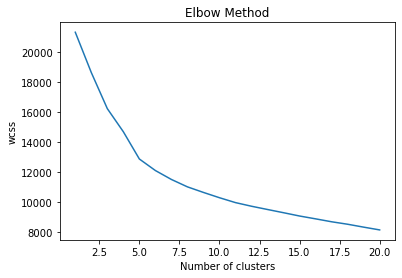

In [26]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss = []
for i in range(1,21):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_train)
    wcss.append(km.inertia_)
    print(i)
plt.plot(range(1,21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
km4 = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_means = km4.fit_predict(X_test)

In [28]:
import numpy as np

for i in range(5):
    print(i, np.count_nonzero(y_means==i))

0 181
1 170
2 58
3 210
4 48


In [29]:
# rerun KMeans for entire data set
# calculate averages for each of 8 features in X per cluster
# calculate proportion of each cluster where y = 0, y = 1

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


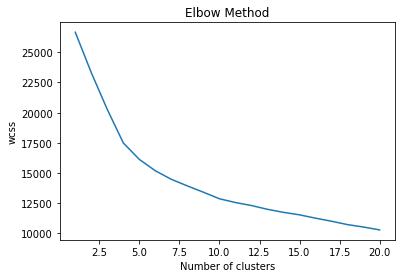

In [31]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss = []
for i in range(1,21):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    print(i)
plt.plot(range(1,21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
import numpy as np
km4 = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
cluster_num = km4.fit_predict(X_scaled)

for i in range(5):
    print(i, np.count_nonzero(cluster_num==i))

0 295
1 1051
2 767
3 953
4 267


In [33]:
churn['cluster_num'] = cluster_num

In [34]:
churn['cluster_num'].describe()

count    3333.000000
mean        1.953795
std         1.128705
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: cluster_num, dtype: float64

In [35]:
churn['Account Length'].groupby(churn['cluster_num']).mean()

cluster_num
0    102.928814
1     79.130352
2    100.876141
3    124.590766
4    101.917603
Name: Account Length, dtype: float64

In [36]:
for i in X.columns:
    print(churn[i].groupby(churn['cluster_num']).mean())
    print()

cluster_num
0    102.928814
1     79.130352
2    100.876141
3    124.590766
4    101.917603
Name: Account Length, dtype: float64

cluster_num
0    1.000000
1    0.000000
2    0.000000
3    0.000000
4    0.104869
Name: Intl Plan, dtype: float64

cluster_num
0    0.277966
1    0.000000
2    1.000000
3    0.001049
4    0.269663
Name: VMail Plan, dtype: float64

cluster_num
0    188.695932
1    186.457469
2    178.503520
3    170.965582
4    178.711236
Name: Day Mins, dtype: float64

cluster_num
0    203.503729
1    185.552426
2    201.229596
3    216.963484
4    201.157303
Name: Eve Mins, dtype: float64

cluster_num
0    196.506441
1    219.504472
2    201.911343
3    181.641028
4    198.007491
Name: Night Mins, dtype: float64

cluster_num
0    10.649153
1    11.048811
2    10.158149
3     9.265687
4    10.283146
Name: Intl Mins, dtype: float64

cluster_num
0    0
1    0
2    0
3    0
4    1
Name: CSCalls?, dtype: int64



In [37]:
churn['Churn?'].groupby(churn['cluster_num']).mean()

cluster_num
0    0.400000
1    0.114177
2    0.026076
3    0.091291
4    0.516854
Name: Churn?, dtype: float64

In [38]:
### Interpreting the Clusters ... Chapter 7 - Unsupervised Learning
from collections import Counter
print(Counter(km4.labels_))

Counter({1: 1051, 3: 953, 2: 767, 0: 295, 4: 267})


In [39]:
centers = pd.DataFrame(km4.cluster_centers_, columns=X.columns)
centers

,Account Length,Intl Plan,VMail Plan,Day Mins,Eve Mins,Night Mins,Intl Mins,CSCalls?
0,0.046815,3.052685,0.002992,0.163808,0.049765,-0.086334,0.147545,-0.295100
1,-0.548958,-0.327580,-0.618396,0.121149,-0.307569,0.371117,0.288435,-0.295100
2,-0.004738,-0.327580,1.617086,-0.023349,0.004916,0.020553,-0.028353,-0.295100
3,0.588730,-0.327580,-0.616051,-0.160049,0.318859,-0.383227,-0.345550,-0.295100
4,0.021418,0.026904,-0.015570,-0.019535,0.003490,-0.056649,0.016426,3.388679


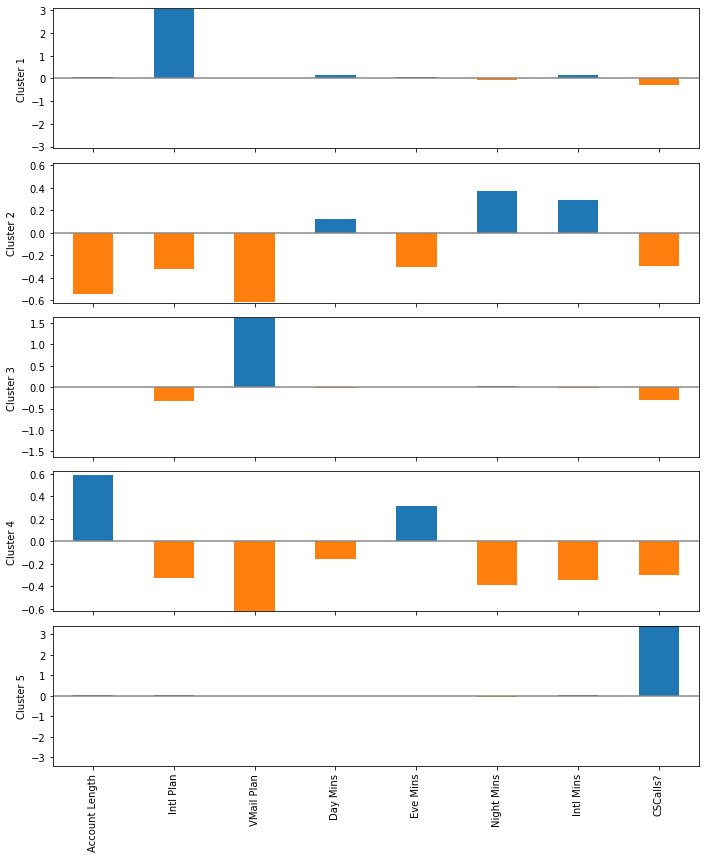

In [40]:
f, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

In [41]:
# SVM - see what results - binary classification

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [42]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[569  10]
 [ 35  53]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       579
           1       0.84      0.60      0.70        88

    accuracy                           0.93       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.93      0.93      0.93       667



In [43]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[569  10]
 [ 36  52]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       579
           1       0.84      0.59      0.69        88

    accuracy                           0.93       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.93      0.93      0.93       667



In [44]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[519  60]
 [ 73  15]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       579
           1       0.20      0.17      0.18        88

    accuracy                           0.80       667
   macro avg       0.54      0.53      0.54       667
weighted avg       0.79      0.80      0.79       667

